## Course 4: Perceptron binaire
### Author: Ricardo Vallejo


L’objectif de ces exercices est de pratiquer le perceptron simple et le perceptron multicouche.
Soit l’ensemble des données Iris qui comprend 150 observations de fleurs

d’iris décrites par la longueur et la largeur des sépales et des pétales. Trois espèces différentes sont incluses Iris setosa, Iris versicolor et Iris virginica

In [1]:
# https://github.com/Giorgos-Arg/iris-perceptron
# https://shunsvineyard.info/2017/10/22/machine-learning-basics-and-perceptron-learning-algorithm/

# AND Example"  https://www.mathematik.uni-muenchen.de/~deckert/teaching/SS18/sec-steps.html
# IRIS:  https://nthu-datalab.github.io/ml/labs/04-1_Perceptron_Adaline/04-1_Perceptron_Adaline.html

The Perceptron Algorithm:
Start with a random set of weights w.
Pick an arbitrary pattern x ∈ C1 ∪ C2.
If x ∈ C1 and x · w < 0 goto 2. Else w → w − λx. Goto 2
If x ∈ C2 and x · w ≥ 0 goto 2. Else w → w + λx. Goto 2

# <font color="blue" >Exercice 1 : Perceptron simple (binaire) </font>

# 1.  Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

# 1. Téléchargez le contenu de la base de données iris

data = pd.read_csv("iris.csv")
pd.set_option('display.max_rows', None)
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 1.1.  Identify Classes et Features

In [6]:
fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics

In [7]:
cn = ['setosa', 'versicolor', 'virginica'] #Classes

### 1.2. Check the distribution or instances of any class


In [8]:
data.groupby('species').size()  #Class species ALL DATA

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## 2. Split data in Training Data and Test Data

Affecter l’étiquette Y (variable cible) « 1 » aux observations dont la
classe est Iris setosa et l’étiquette « 0 » aux autres classes (Not Iris
setosa).

In [9]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics
from sklearn.model_selection import train_test_split

colors = data['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'blue', 'green'])
data['class_color'] = colors
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 10)

X_train = train [['petal_length','petal_width']] #test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['petal_length','petal_width']] #test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test[['species']] 

# create a new column based on condition
specieTarget = 'setosa'
#Y_test['species'] = np.where(Y_test['species'] == specieTarget, 1, 0)
Y_train['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=[1, 0, 0], inplace=True)
Y_test['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=[1, 0, 0], inplace=True)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [10]:
train.groupby('species').size() #SPLITED DATA TRAINING

species
setosa        30
versicolor    30
virginica     30
dtype: int64

In [11]:
test.groupby('species').size() #SPLITED DATA TESTS

species
setosa        20
versicolor    20
virginica     20
dtype: int64


## 3. . Représentez la dispersion de la variable Petal width en fonction de la variable Petal length 

In [12]:
colors = data['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'blue', 'green'])

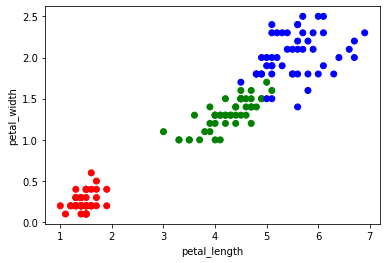

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data['petal_length'], data['petal_width'], c=colors)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

No handles with labels found to put in legend.


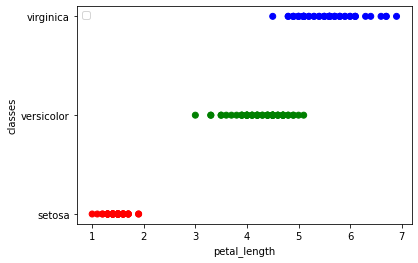

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data['petal_length'], data['species'], c=colors)
plt.legend(loc='upper left');
plt.xlabel('petal_length')
plt.ylabel('classes')

plt.show()

## 5. Entrainez un perceptron simple sur l’ensemble des données


In [26]:
from sklearn.linear_model import Perceptron
# ins tan tia te the model
modelPerceptron = Perceptron (max_iter=100, tol=1e-3, random_state=42)
# f i t the model with data
modelPerceptron.fit(X_train,np.array(Y_train).ravel())


Perceptron(max_iter=100, random_state=42)

In [27]:
train_acc = modelPerceptron.score(X_train, Y_train['species'])
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 100.0


In [53]:
modelPerceptron.intercept_

array([3.])

In [54]:
modelPerceptron.coef_

array([[-0.6, -1.5]])

## 5.1. Prediction

In [55]:
Y_pred=modelPerceptron.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

## 5.2. Evaluation de model

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[40  0]
 [ 0 20]]


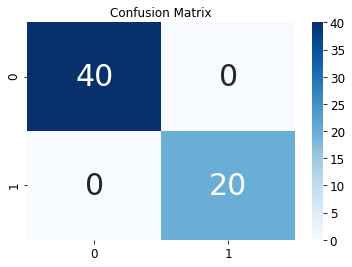

In [57]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [58]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## 5.6.  Equations de model - TODO

In [59]:
modelPerceptron.coef_

array([[-0.6, -1.5]])

In [60]:
modelPerceptron.intercept_

array([3.])

## 5.7. Evaluation de modele

In [34]:

from sklearn.metrics import accuracy_score
Y_test = pd.DataFrame(Y_test)
print('Misclassified samples: %d' % (Y_pred != np.array(Y_test).ravel()).sum())
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

Misclassified samples: 0
Accuracy: 1.00


In [66]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,class_color
0,5.1,3.5,1.4,0.2,setosa,red
1,4.9,3.0,1.4,0.2,setosa,red
2,4.7,3.2,1.3,0.2,setosa,red
3,4.6,3.1,1.5,0.2,setosa,red
4,5.0,3.6,1.4,0.2,setosa,red
5,5.4,3.9,1.7,0.4,setosa,red
6,4.6,3.4,1.4,0.3,setosa,red
7,5.0,3.4,1.5,0.2,setosa,red
8,4.4,2.9,1.4,0.2,setosa,red
9,4.9,3.1,1.5,0.1,setosa,red


In [78]:
X = data[['petal_length','petal_width']]
y = data[['species']]


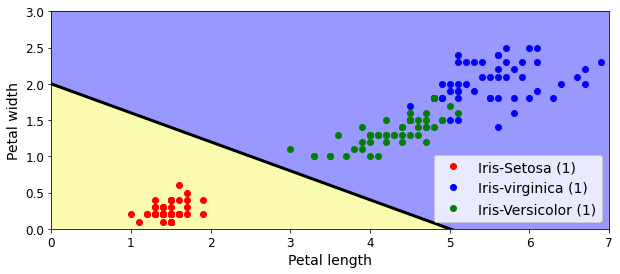

In [93]:

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

a = -modelPerceptron.coef_[0][0] / modelPerceptron.coef_[0][1]
b = -modelPerceptron.intercept_ / modelPerceptron.coef_[0][1]


axes = [0, 7, 0, 3]
x0, x1 = np.meshgrid(
 np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
 np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
 )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = modelPerceptron.predict(X_new)

zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))

plt.plot(X[y['species']=='setosa']['petal_length'], X[y['species']=='setosa']['petal_width'], "ro", label="Iris-Setosa (1)")
plt.plot(X[y['species']=='virginica']['petal_length'], X[y['species']=='virginica']['petal_width'], "bo", label="Iris-virginica (1)")
plt.plot(X[y['species']=='versicolor']['petal_length'], X[y['species']=='versicolor']['petal_width'], "go", label="Iris-Versicolor (1)")


plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)


from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)


plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# <font color="blue"> Excercise 2: Perceptron manual binaire - AND </font>

In [242]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

y = np.array([0, 0, 0, 1])

#lr: Learning rate

class myPerceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100, w0=np.zeros(X.shape[0]+1)):
        self.W = w0
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
    
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x


In [243]:

wo = np.array([0.1, 0.2, 0.05])

perceptron = myPerceptron(X.shape[1], epochs=2, lr=1, w0=wo)
perceptron.fit(X, y)
print(perceptron.W)

[-0.9   2.2   1.05]


In [244]:

wo = np.array([0.1, 0.2, 0.05])

perceptron = myPerceptron(X.shape[1], epochs=100, lr=1, w0=wo)
perceptron.fit(X, y)
print(perceptron.W)

[-2.9   2.2   1.05]


In [245]:
wo = np.zeros(X.shape[1]+1)

perceptron = myPerceptron(X.shape[1], epochs=100, lr=1, w0=wo)
perceptron.fit(X, y)
print(perceptron.W)  # [-3.  2.  1.] Good response!

[-3.  2.  1.]


In [246]:
weights = perceptron.W

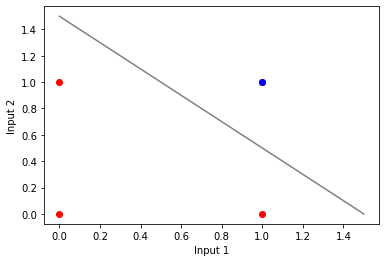

In [247]:

# DATA
x1 = X[:,0] #np.array([0, 1, 0])
x2 = X[:,1] #np.array([0, 0, 1])
plt.scatter(x1, x2, c='red')
x1 = np.array([1])
x2 = np.array([1])
plt.scatter(x1, x2, c='blue')

# MODEL PERCEPTRON
W = -1 #????
b = 1.5
x = np.linspace(0, 1.5)
plt.plot(x, W*x+b, c='gray')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

If both inputs are 0, then the pre-activation will be -3+0*2+0*1 = -3. 
When applying our activation function, we get 0, which is exactly 0 AND 0! 

## Using perceptron scikit learn

In [248]:
from sklearn.linear_model import Perceptron
# ins tan tia te the model
modelPerceptron2 = Perceptron (max_iter=100, tol=0.0, random_state=42)
# f i t the model with data
modelPerceptron2.fit(X,y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Perceptron(max_iter=100, random_state=42, tol=0.0)

In [249]:
train_acc = modelPerceptron2.score(X, y)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 100.0


In [278]:
Y_pred2=modelPerceptron2.predict(X)
Y_pred2

array([0, 0, 0, 1])

In [279]:
modelPerceptron2.coef_

array([[2., 2.]])

In [280]:
modelPerceptron2.intercept_

array([-3.])

In [281]:
modelPerceptron2.get_params

<bound method BaseEstimator.get_params of Perceptron(max_iter=100, random_state=42, tol=0.0)>

In [182]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import hard_sigmoid

# <font color="blue"> Excercise 3:  Perceptron multicouche </font>

In [183]:
# http://eric.univ-lyon2.fr/~ricco/cours/slides/reseaux_neurones_perceptron.pdf
# https://annisap.medium.com/build-your-first-neural-network-in-python-c80c1afa464


In [196]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:,:]
y = iris.target


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


## Variable numero de hidden layers

### iterations = 5  No Convergence et bas score

In [198]:
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=10,solver='sgd',learning_rate_init= 0.1, max_iter=5)
# Train the model
mlp.fit(X_train, np.array(y_train).ravel())

# Score 
score = (mlp.score(X_test,y_test))
print(score)

0.31666666666666665


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


### Modele correct

In [199]:
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=5,solver='sgd',learning_rate_init= 0.1, max_iter=1000)
# Train the model
mlp.fit(X_train, np.array(y_train).ravel())

# Score 
score = (mlp.score(X_test,y_test))
print(score)

Y_pred = mlp.predict(X_test)

1.0


In [200]:
Y_pred

array([2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2])

In [205]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[21  0  0]
 [ 0 20  0]
 [ 0  0 19]]


Text(0, 0.5, 'Petal width')

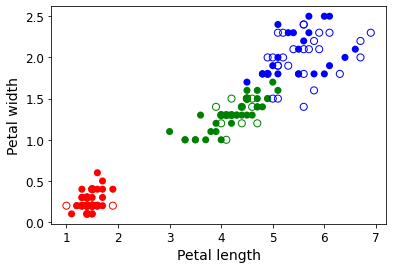

In [202]:
# afficher les nuages des données d'apprentissage (pleins) et de test (creux)
# ['r','g','b'] respectivement pour ['setosa', 'versicolor', 'virginica']
cmp = np.array(['r','g','b'])
plt.figure()
plt.scatter(X_train1[:,2],X_train1[:,3],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,2],X_test1[:,3],c='none',s=50,edgecolors=cmp[y_test1])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)